## [Lecture 11.2: K-means clustering from scratch](https://www.youtube.com/watch?v=b7Lbgnwbm-0)

### Objective
In this notebook, we will be implementing k-means clustering algorithm

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot styling
import numpy as np

from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs

### K-means clustering algorithm

k-means clustering algorithm is an iterative algorithm that proceeds as follows:
**Input**:
- $n$ training examples represented with $m$ features
- Number of centroids: $k$

In [2]:
cluster_count=3

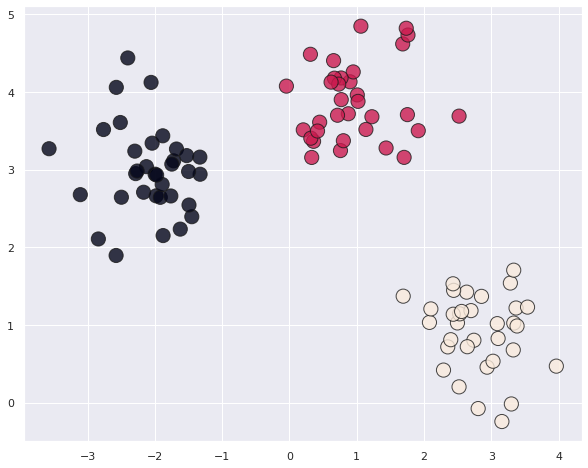

In [4]:
X, y = make_blobs(n_samples=100,
                  n_features=2,
                  centers=[[-2, 3], [1, 4], [3, 1]],
                  cluster_std=0.5,
                  random_state=12)

# plot the two classes
plt.figure(figsize=(10, 8))
plt.grid(True)
plt.scatter(X[:,0], X[:, 1], marker='o', c=y,
            s=200, edgecolor='k', alpha=0.8)
plt.show()

In [5]:
X.shape

(100, 2)

**Algorithm**:
1. Randomly initialize $k$ centroids. Note that each centroid is a vector in $m$ dimensional space
2. Repeat until convergence:
   1. Assign points to the closest centroids.
   2. Calculate the centroids based on points assigned to the cluster

The algorithm converges when the centroid stops changing or in other words the cluster membership stabilizes and subsequent iterations do not yield any changes.

In [6]:
def fit(X, k):
    # take three random points from the data set and take them as initial centroids
    centroids = X[np.random.randint(0, X.shape[0], size=k)]

    #calculate initial label of each data point
    labels = np.argmin(cdist(X, centroids), axis=1)

    for _iteration in range(10):
        # copy labels for all points for comparing later
        previous_labels = labels.copy()

        # compute new centroids
        centroids = np.array([np.mean(X[labels == r], axis=0) for r in range(k)])

        # At last recalculate label of each data point
        labels = np.argmin(cdist(X, centroids), axis=1)

        # check if labels of points are not changing
        if all(labels == previous_labels):
            break
    return centroids, labels

In [7]:
centroids, labels = fit(X, cluster_count)

In [8]:
print('Centroids: ', centroids)

Centroids:  [[ 0.95467494  3.87123697]
 [ 2.81322812  0.91003123]
 [-2.0824147   2.98976157]]


Let's visualize cluster centers as obtained through k-means clustering algorithm.

In [11]:
def plot_kmeans(X, centroids, labels, rseed=0, ax=None):

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')

    # plot data points
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='plasma', zorder=2)

    # plot the representation of the KMeans model
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centroids)]
    for c, r in zip(centroids, radii):
        # add circular shapes to the clusters
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=5, alpha=0.5, zorder=1))

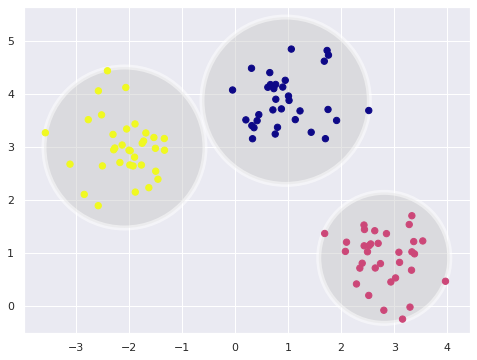

In [12]:
plt.figure(figsize=(8, 6))
plot_kmeans(X, centroids, labels)

**Exercise**:
1. Implement **elbow method** for finding optimal k
2. Implement **Silhoutte** for finding optimal k